In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer
from latex_tokenizer import LatexTokenizer

In [2]:
trocr_tokenizer = AutoTokenizer.from_pretrained('microsoft/trocr-base-printed')
texteller_tokenizer = AutoTokenizer.from_pretrained('OleehyO/TexTeller')
im2latex_tokenizer = AutoTokenizer.from_pretrained('DGurgurov/im2latex')
my_tokenizer = LatexTokenizer('./normalize_latex.js')
my_tokenizer.load_vocab('vocabulary.json')

In [3]:
print(f'{trocr_tokenizer.vocab_size=}')
print(f'{texteller_tokenizer.vocab_size=}')
print(f'{im2latex_tokenizer.vocab_size=}')
print(f'{my_tokenizer.vocab_size=}')

trocr_tokenizer.vocab_size=50265
texteller_tokenizer.vocab_size=11500
im2latex_tokenizer.vocab_size=50257
my_tokenizer.vocab_size=658


In [4]:
def show_example(latex):
    trocr_tokenized = trocr_tokenizer.encode(latex)
    print(f'TrOCR: {len(trocr_tokenized)} tokens')
    print(trocr_tokenized)
    print(trocr_tokenizer.convert_ids_to_tokens(trocr_tokenized))

    texteller_tokenized = texteller_tokenizer.encode(latex)
    print(f'\nTexTeller: {len(texteller_tokenized)} tokens')
    print(texteller_tokenized)
    print(texteller_tokenizer.convert_ids_to_tokens(texteller_tokenized))

    im2latex_tokenized = im2latex_tokenizer.encode(latex)
    print(f'\nim2latex: {len(im2latex_tokenized)} tokens')
    print(im2latex_tokenized)
    print(im2latex_tokenizer.convert_ids_to_tokens(im2latex_tokenized))

    my_tokenized = my_tokenizer.encode_batch({'latex_formula': [latex]})['input_ids'][0]
    print(f'\nMy Tokenizer : {len(my_tokenized)} tokens')
    print(my_tokenized)
    print(my_tokenizer.convert_ids_to_tokens(my_tokenized))

In [5]:
show_example(r'\begin{aligned}s\omega _{1}=\partial _{i}k^{i}, \end{aligned}')

TrOCR: 31 tokens
[0, 37457, 43230, 45152, 36967, 24303, 29, 37457, 4399, 2538, 18134, 45152, 134, 24303, 5214, 37457, 45593, 18134, 45152, 118, 24303, 330, 49688, 118, 48268, 44128, 1397, 45152, 36967, 24303, 2]
['<s>', '\\', 'begin', '{', 'aligned', '}', 's', '\\', 'ome', 'ga', 'Ġ_', '{', '1', '}', '=', '\\', 'partial', 'Ġ_', '{', 'i', '}', 'k', '^{', 'i', '},', 'Ġ\\', 'end', '{', 'aligned', '}', '</s>']

TexTeller: 26 tokens
[0, 64, 412, 95, 1393, 97, 87, 64, 437, 604, 21, 378, 381, 604, 77, 97, 79, 262, 77, 312, 283, 409, 95, 1393, 97, 2]
['<s>', '\\', 'begin', '{', 'aligned', '}', 's', '\\', 'omega', 'Ġ_{', '1', '}=\\', 'partial', 'Ġ_{', 'i', '}', 'k', '^{', 'i', '},', 'Ġ\\', 'end', '{', 'aligned', '}', '</s>']

im2latex: 29 tokens
[59, 27471, 90, 41634, 92, 82, 59, 462, 4908, 4808, 90, 16, 92, 28, 59, 47172, 4808, 90, 72, 92, 74, 36796, 72, 5512, 3467, 437, 90, 41634, 92]
['\\', 'begin', '{', 'aligned', '}', 's', '\\', 'ome', 'ga', 'Ġ_', '{', '1', '}', '=', '\\', 'partial', 'Ġ_', 

In [8]:
show_example(r'a_{n+1} = a_{n}^{2} + 4a_{n} - 10')

TrOCR: 24 tokens
[0, 102, 49747, 282, 2744, 134, 24303, 5457, 10, 49747, 282, 24303, 49688, 176, 24303, 2055, 204, 102, 49747, 282, 24303, 111, 158, 2]
['<s>', 'a', '_{', 'n', '+', '1', '}', 'Ġ=', 'Ġa', '_{', 'n', '}', '^{', '2', '}', 'Ġ+', 'Ġ4', 'a', '_{', 'n', '}', 'Ġ-', 'Ġ10', '</s>']

TexTeller: 23 tokens
[0, 69, 261, 82, 15, 21, 97, 572, 550, 261, 82, 269, 22, 97, 993, 859, 69, 261, 82, 97, 742, 1055, 2]
['<s>', 'a', '_{', 'n', '+', '1', '}', 'Ġ=', 'Ġa', '_{', 'n', '}^{', '2', '}', 'Ġ+', 'Ġ4', 'a', '_{', 'n', '}', 'Ġ-', 'Ġ10', '</s>']

im2latex: 22 tokens
[64, 23330, 77, 10, 16, 92, 796, 257, 23330, 77, 92, 36796, 17, 92, 1343, 604, 64, 23330, 77, 92, 532, 838]
['a', '_{', 'n', '+', '1', '}', 'Ġ=', 'Ġa', '_{', 'n', '}', '^{', '2', '}', 'Ġ+', 'Ġ4', 'a', '_{', 'n', '}', 'Ġ-', 'Ġ10']

My Tokenizer : 29 tokens
[2, 32, 7, 5, 21, 17, 11, 6, 15, 32, 7, 5, 21, 6, 8, 5, 13, 6, 17, 61, 32, 7, 5, 21, 6, 14, 11, 23, 3]
['<sos>', 'a', '_', '{', 'n', '+', '1', '}', '=', 'a', '_', '{', 'n', '}',

In [7]:
show_example(r'\nu (z) := \langle \phi( z ) , \nabla g( z ) \rangle')

TrOCR: 28 tokens
[0, 37457, 18373, 36, 329, 43, 49614, 44128, 462, 14982, 44128, 32079, 1640, 992, 4839, 2156, 44128, 282, 873, 2560, 821, 1640, 992, 4839, 44128, 338, 14982, 2]
['<s>', '\\', 'nu', 'Ġ(', 'z', ')', 'Ġ:=', 'Ġ\\', 'l', 'angle', 'Ġ\\', 'phi', '(', 'Ġz', 'Ġ)', 'Ġ,', 'Ġ\\', 'n', 'ab', 'la', 'Ġg', '(', 'Ġz', 'Ġ)', 'Ġ\\', 'r', 'angle', '</s>']

TexTeller: 25 tokens
[0, 64, 459, 629, 94, 13, 1585, 283, 473, 283, 353, 12, 774, 1624, 225, 16, 283, 450, 750, 12, 774, 1624, 283, 467, 2]
['<s>', '\\', 'nu', 'Ġ(', 'z', ')', 'Ġ:=', 'Ġ\\', 'langle', 'Ġ\\', 'phi', '(', 'Ġz', 'Ġ)', 'Ġ', ',', 'Ġ\\', 'nabla', 'Ġg', '(', 'Ġz', 'Ġ)', 'Ġ\\', 'rangle', '</s>']

im2latex: 26 tokens
[59, 28803, 357, 89, 8, 19039, 3467, 75, 9248, 3467, 34846, 7, 1976, 1267, 837, 3467, 77, 397, 5031, 308, 7, 1976, 1267, 3467, 81, 9248]
['\\', 'nu', 'Ġ(', 'z', ')', 'Ġ:=', 'Ġ\\', 'l', 'angle', 'Ġ\\', 'phi', '(', 'Ġz', 'Ġ)', 'Ġ,', 'Ġ\\', 'n', 'ab', 'la', 'Ġg', '(', 'Ġz', 'Ġ)', 'Ġ\\', 'r', 'angle']

My Tokenizer : 20 

In [8]:
data = load_dataset("OleehyO/latex-formulas", "cleaned_formulas")
data = my_tokenizer.filter_dataset(data['train'])

In [9]:
print(len(data['latex_formula']))
data['latex_formula'][0]

538420


'\\begin{align*}-\\div (y^{1-2m}\\nabla w)=0\\mbox{in}\\mathbb R^n\\times\\mathbb R_+;w\\big|_{y=0}=|u|\\end{align*}'

In [10]:
data = data.map(my_tokenizer.normalize_batch, batched=True, batch_size=5000)

In [11]:
print(len(data['latex_formula']))
data['latex_formula'][0]

538420


'\\begin{aligned} { - \\div ( y ^ { 1 - 2 m } \\nabla w ) = 0 \\mathrm { i n } \\mathbb R ^  { n } \\times \\mathbb R _  { + } ; w \\big | _ { y = 0 } = | u | } \\\\ \\end{aligned} '

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
def compute_histograms(data, tokenizer, max_seq, max_token):
    hist_seq = np.zeros(max_seq, dtype=int)
    hist_token = np.zeros(max_token, dtype=int)
    
    for tok in tokenizer.vocab.keys():
        hist_token[len(tok.removeprefix('Ġ'))] += 1
        
    for example in tqdm(data):
        tokens = example["input_ids"]
        
        seq_len = len(tokens)

        hist_seq[seq_len] += 1
    
    return hist_seq, hist_token

In [14]:
def compute_stats_from_histogram(hist):
    total = hist.sum()
    values = np.arange(len(hist))

    # Mean
    mean = np.sum(values * hist) / total

    # Variance and Std
    variance = np.sum(hist * (values - mean) ** 2) / total
    std = np.sqrt(variance)

    # Median
    cumulative = np.cumsum(hist)
    median_idx = np.searchsorted(cumulative, total // 2)
    median = median_idx

    return mean, std, median

In [23]:
def compute_stats(data, tokenizer):
    max_seq = max(len(example['input_ids']) for example in data)+1
    max_token = max(len(token) for token in tokenizer.vocab.keys())+1
    hist_seq, hist_token = compute_histograms(data, tokenizer, max_seq, max_token)
    mean_seq, std_seq, median_seq = compute_stats_from_histogram(hist_seq)
    mean_tok, std_tok, median_tok = compute_stats_from_histogram(hist_token)
    plt.figure(figsize=(12, 5), dpi=300)
    plt.subplot(1, 2, 1)
    plt.bar(np.arange(max_seq), hist_seq)
    plt.title(f"Sequence Length Histogram\nMean: {mean_seq:.2f} Std: {std_seq:.2f} Median: {median_seq}")
    plt.xlabel("Length")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.bar(np.arange(max_token), hist_token)
    plt.title(f"Token Length Histogram\nMean: {mean_tok:.2f}, Std: {std_tok:.2f}, Median: {median_tok}")
    plt.xlabel("Length")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

In [16]:
encoded_data = data.map(my_tokenizer.encode_batch, batched=True, batch_size=5000)

Map: 100%|██████████| 538420/538420 [01:32<00:00, 5820.53 examples/s]


100%|██████████| 538420/538420 [07:25<00:00, 1208.55it/s]


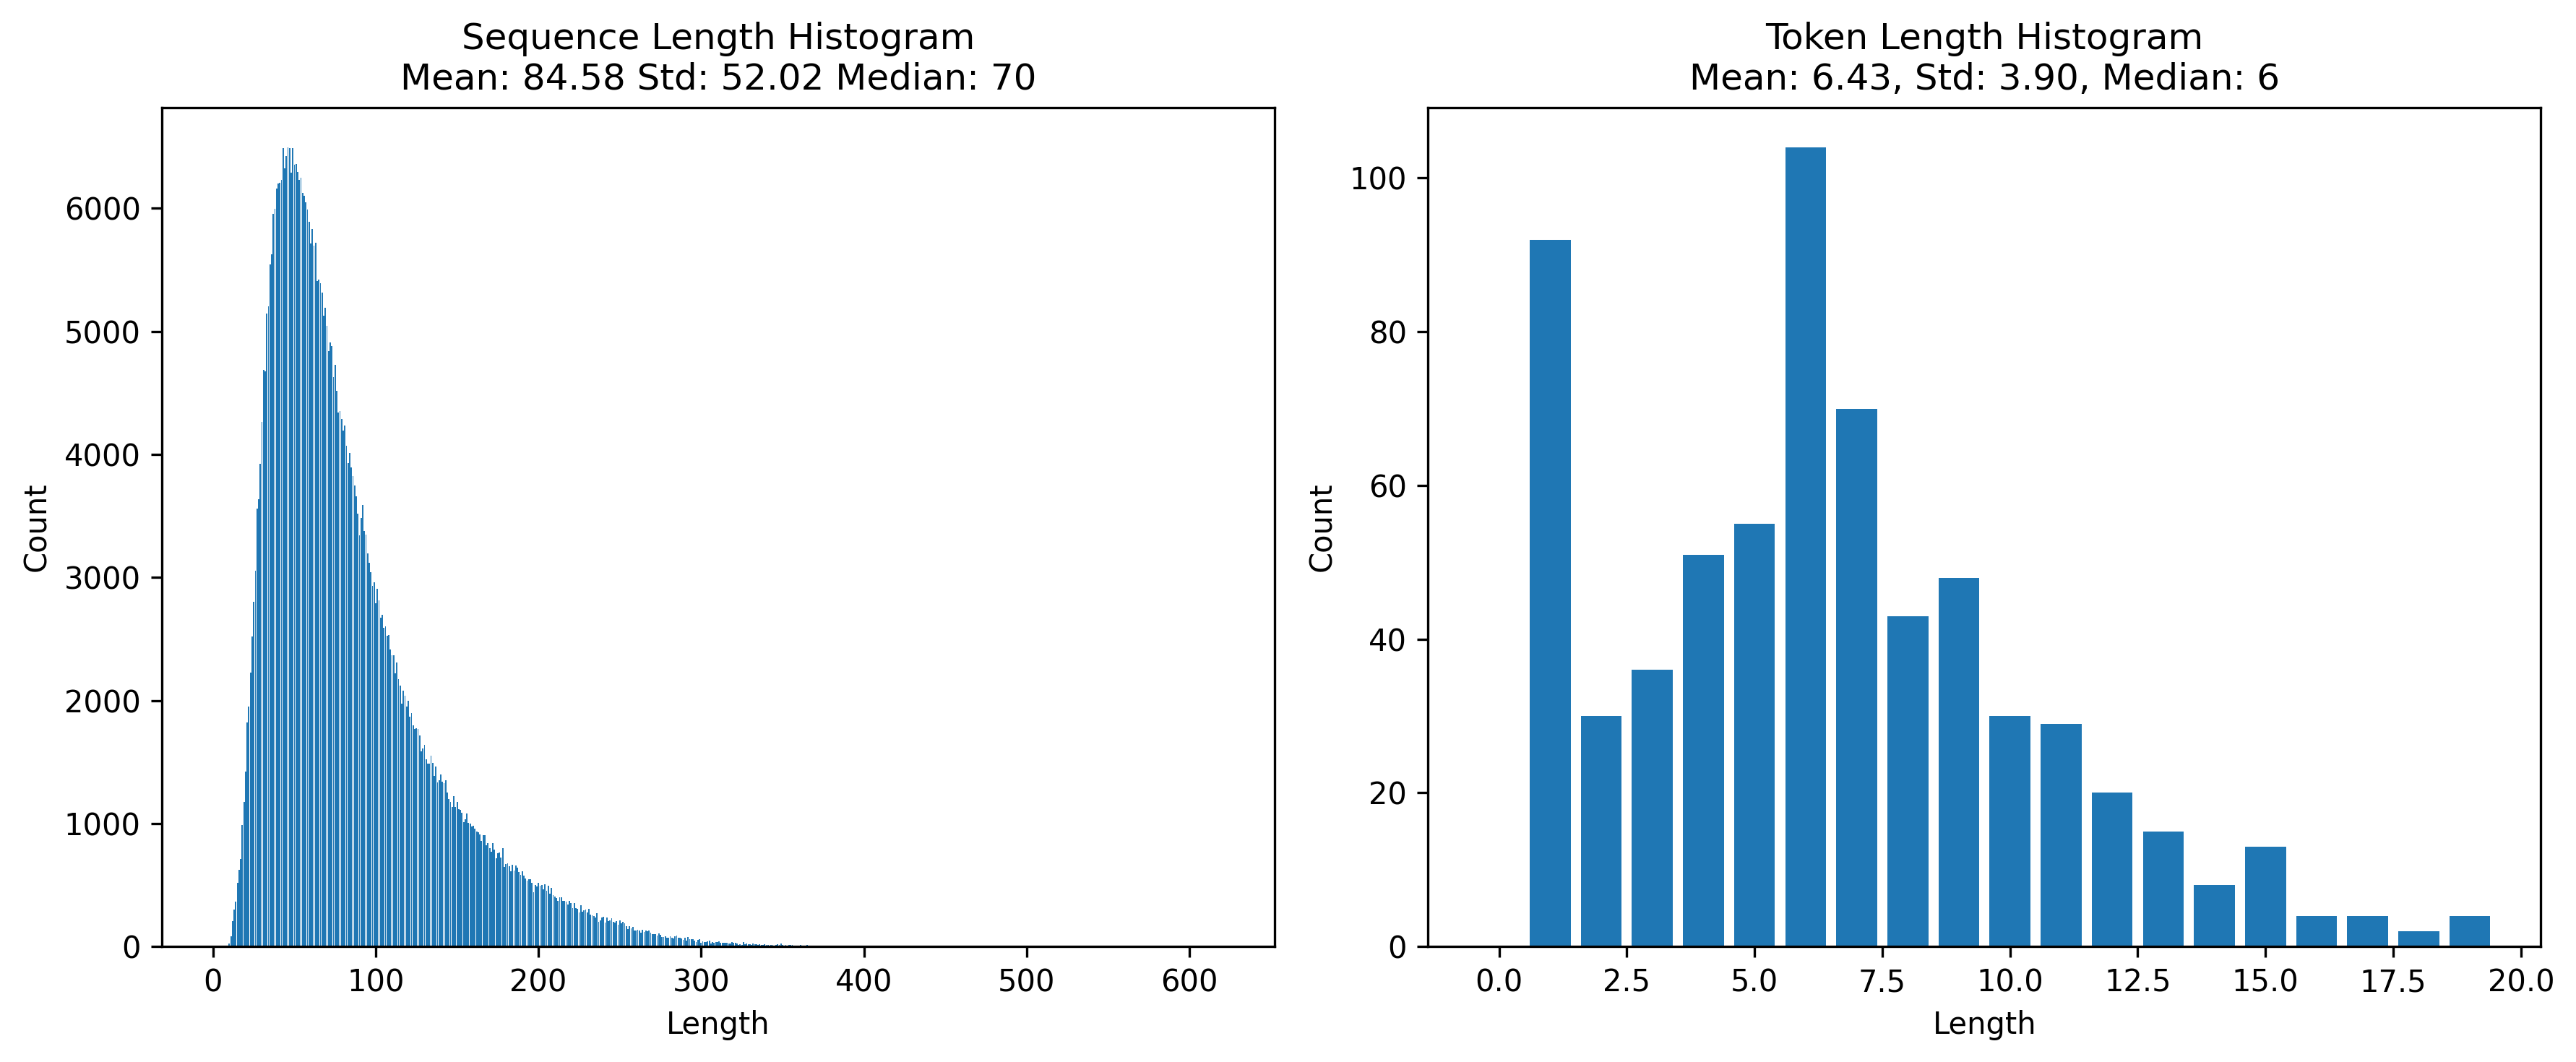

In [24]:
compute_stats(encoded_data, my_tokenizer)

In [25]:
encoded_data = data.map(lambda batch: trocr_tokenizer(batch["latex_formula"], padding=False, truncation=False), batched=True, batch_size=5000)

Map: 100%|██████████| 538420/538420 [01:45<00:00, 5100.16 examples/s]


100%|██████████| 538420/538420 [08:23<00:00, 1068.71it/s]


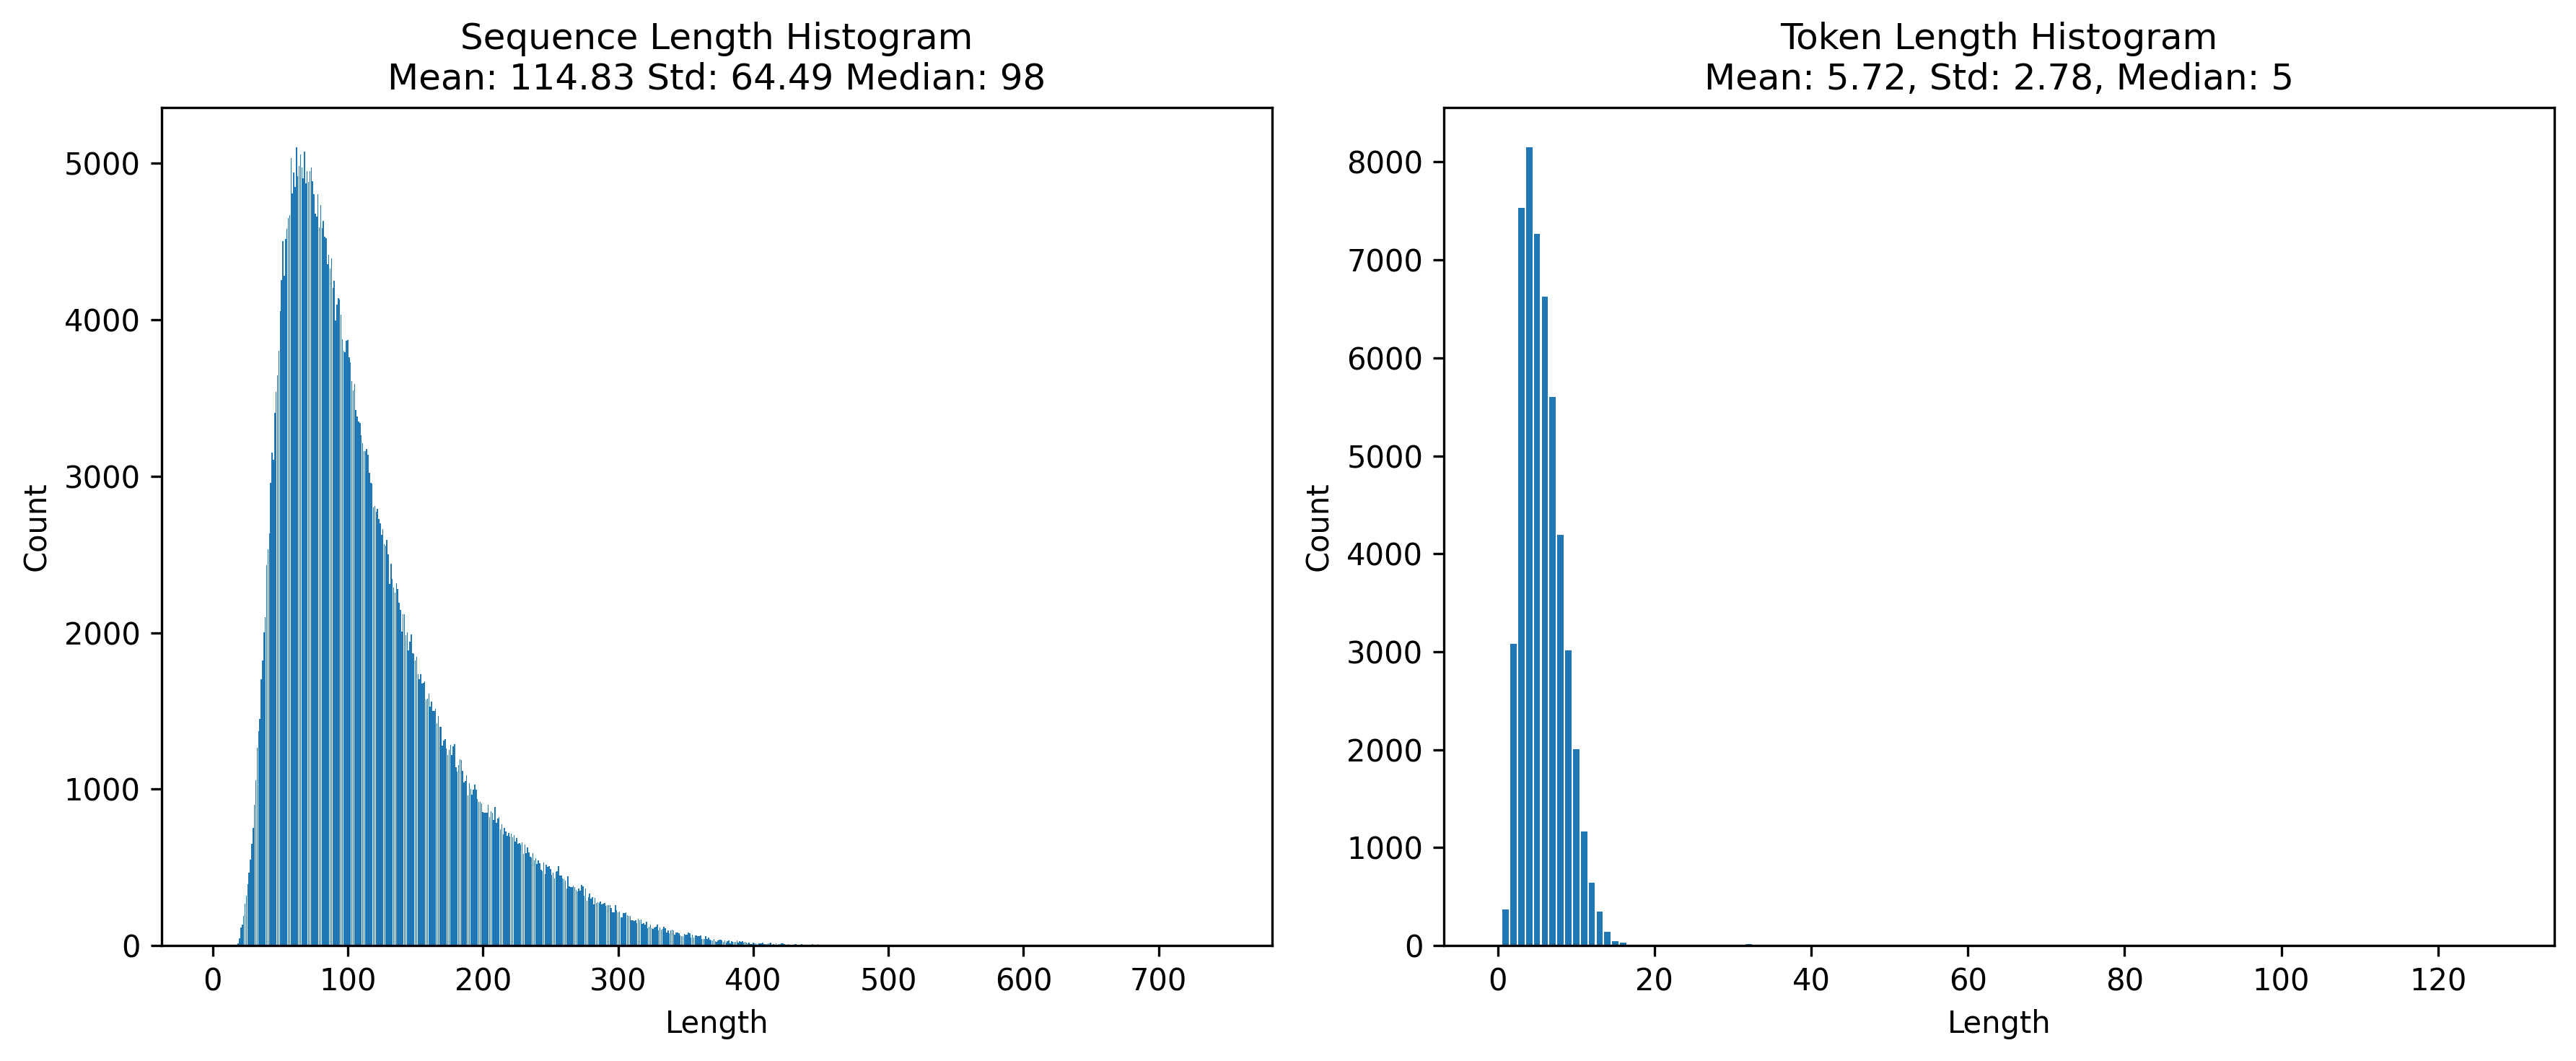

In [26]:
compute_stats(encoded_data, trocr_tokenizer)

In [27]:
encoded_data = data.map(lambda batch: texteller_tokenizer(batch["latex_formula"], padding=False, truncation=False), batched=True, batch_size=5000)

Map: 100%|██████████| 538420/538420 [01:29<00:00, 5993.20 examples/s]


100%|██████████| 538420/538420 [09:26<00:00, 950.28it/s] 


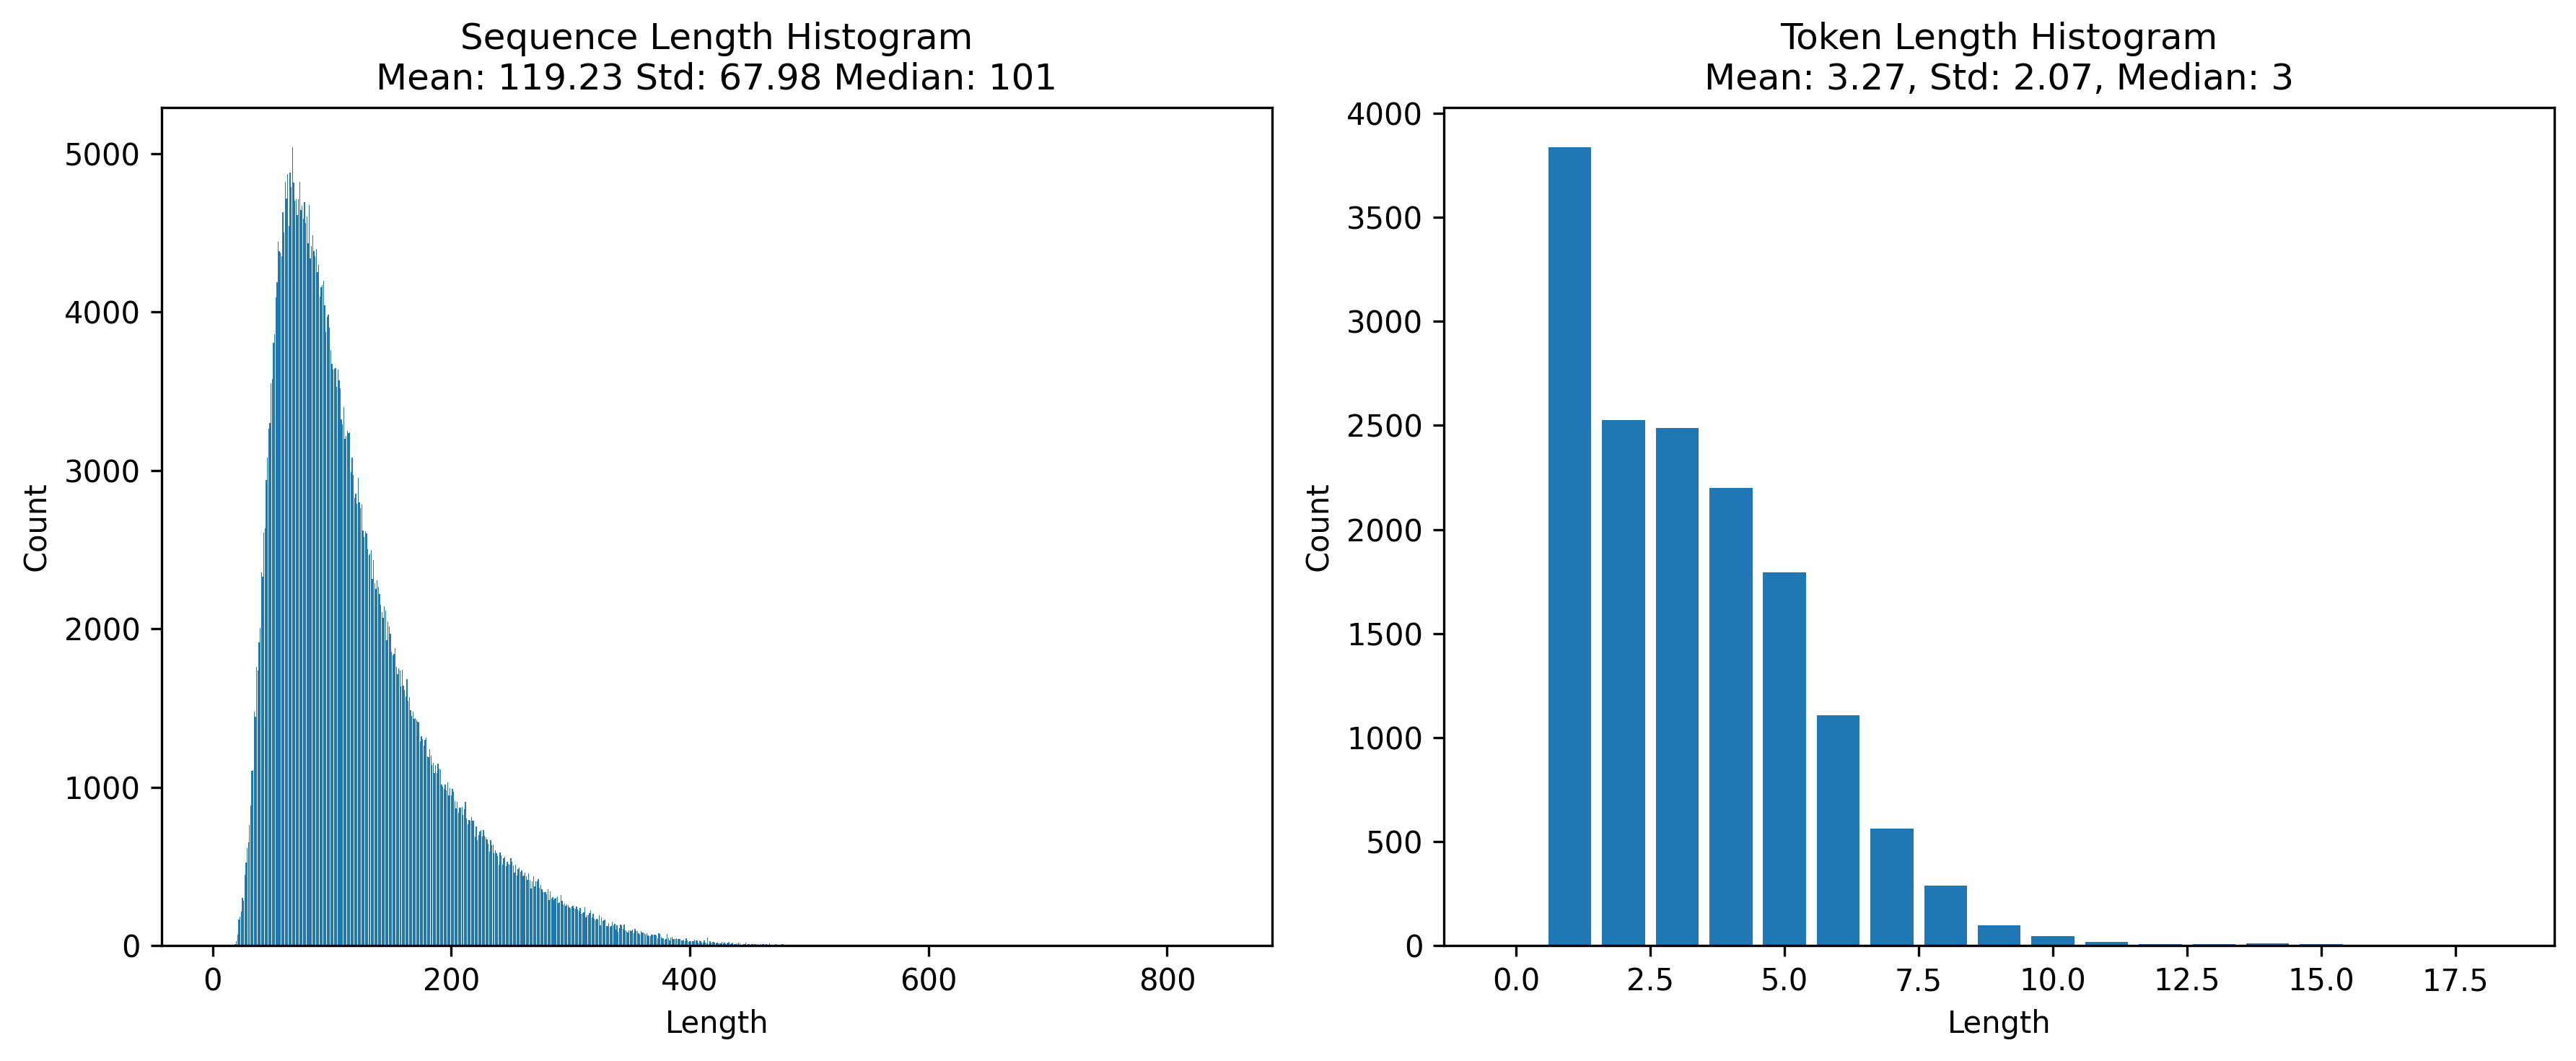

In [28]:
compute_stats(encoded_data, texteller_tokenizer)

In [29]:
encoded_data = data.map(lambda batch: im2latex_tokenizer(batch["latex_formula"], padding=False, truncation=False), batched=True, batch_size=5000)

Map: 100%|██████████| 538420/538420 [01:27<00:00, 6154.00 examples/s]


100%|██████████| 538420/538420 [09:36<00:00, 934.11it/s] 


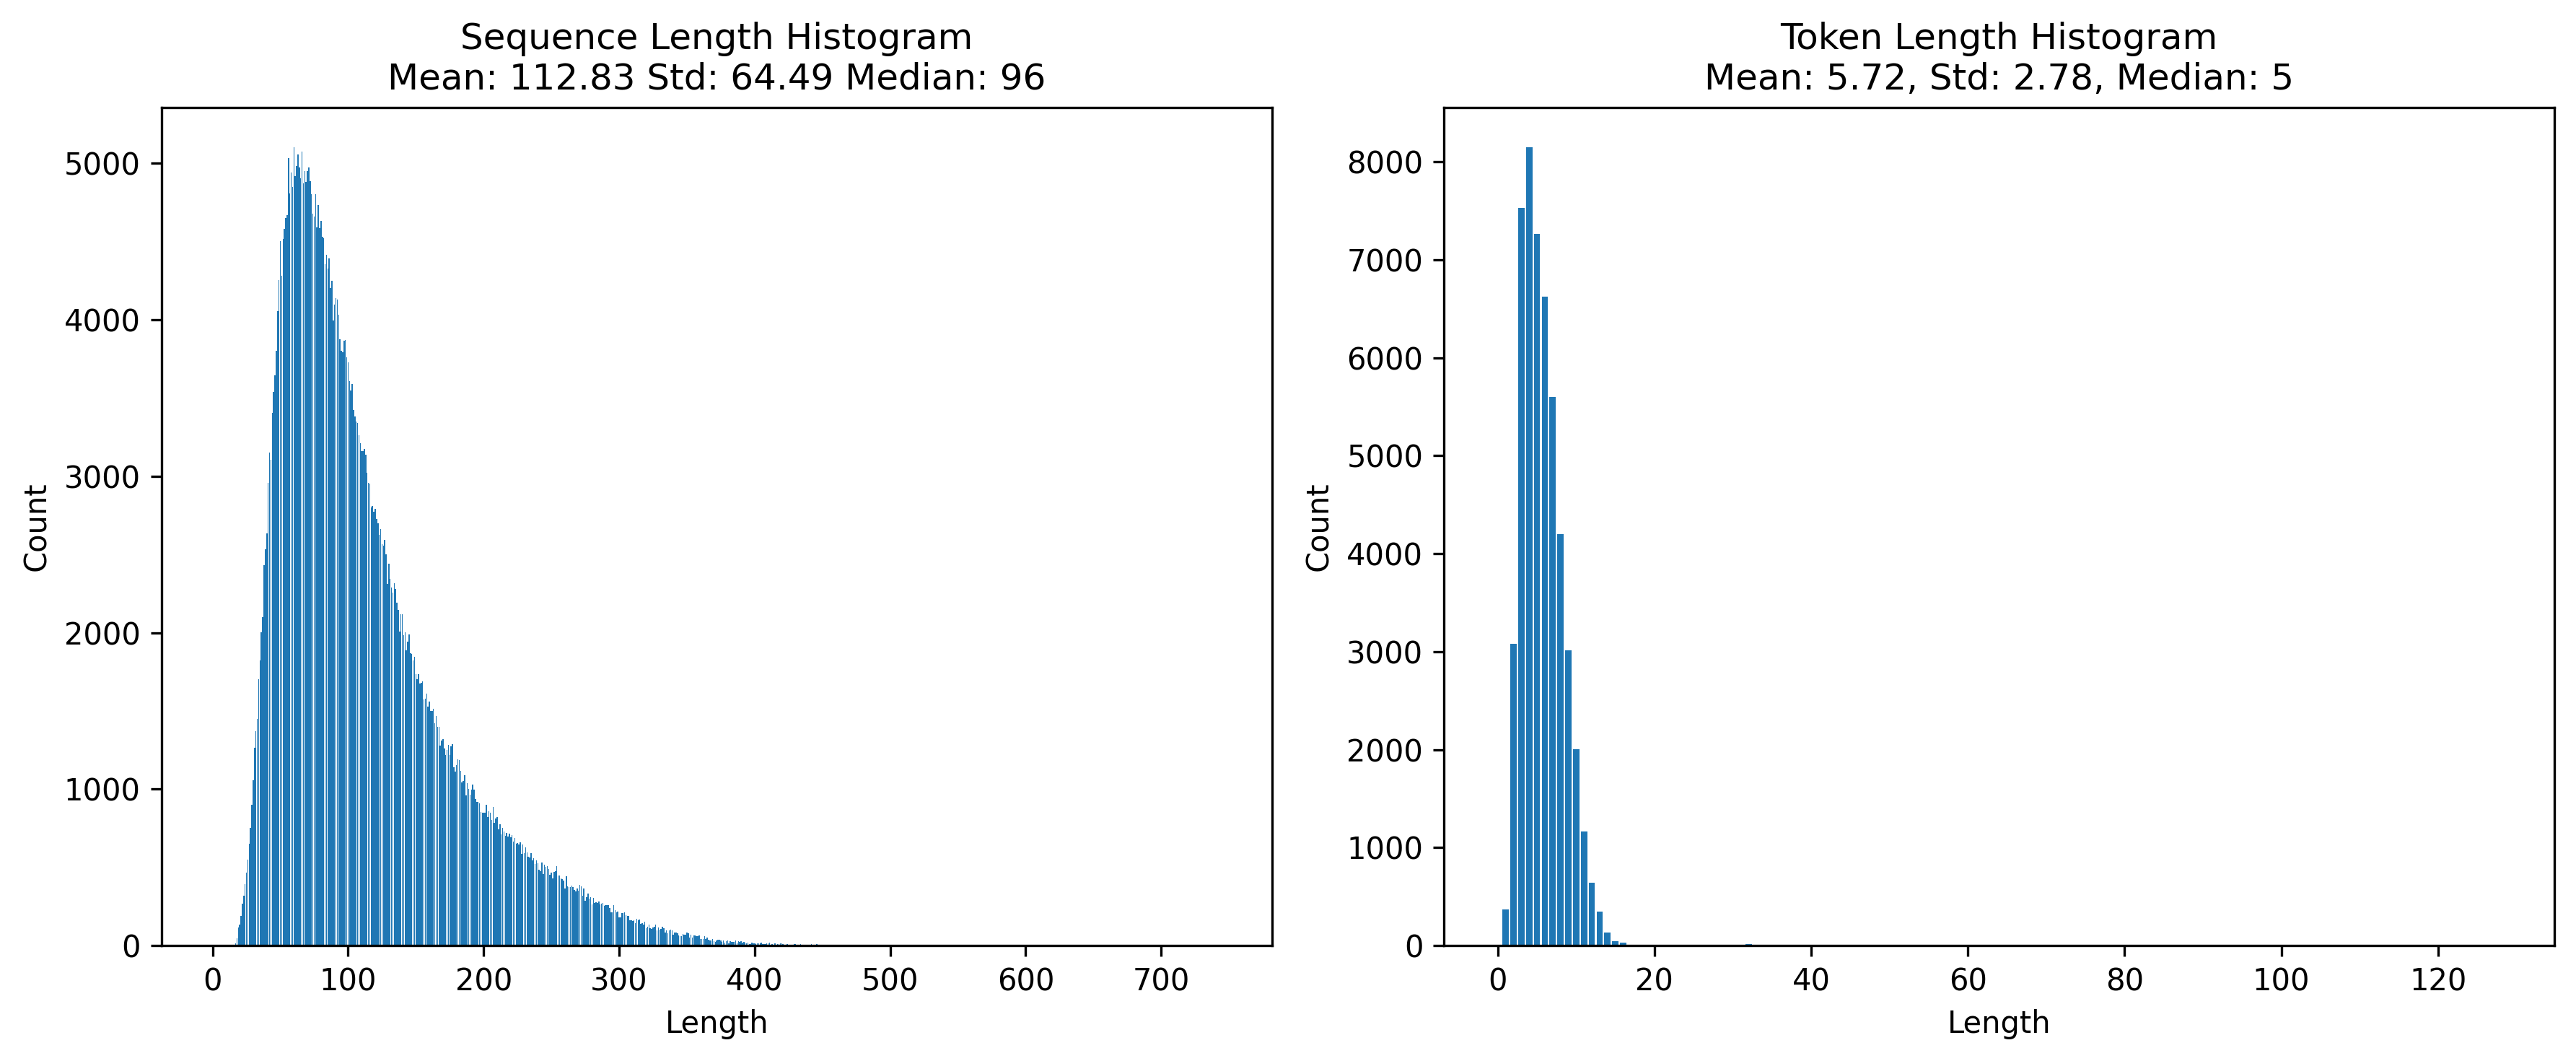

In [30]:
compute_stats(encoded_data, im2latex_tokenizer)